In [1]:
from trace_IO import *
from OF_trigger import *
import matplotlib.pyplot as plt
import numpy as np


In [21]:
# Parameters
energy = 150
n_sets = 100
sampling_frequency = 3906250

# Load template and noise PSD
template = np.load("../templates/template_K_alpha_tight.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")

# Load traces for a single energy level
trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)

max_amplitudes = []

for i in range(n_sets):
    amps = [trigger.fit(trace)[0] for trace in loaded_traces[i]]
    max_amplitudes.append(np.max(amps))

max_amplitudes = np.array(max_amplitudes)

# Print all 100 max amplitudes
print("Max amplitude per trace set:")
print(max_amplitudes)


Max amplitude per trace set:
[7.05150050e-03 1.32729959e+01 2.56732368e-02 3.52596321e+00
 8.16089915e-03 5.37277575e+00 1.44981604e-02 4.80969640e+00
 1.98237462e+00 1.42400277e+01 2.48103490e-02 3.56699371e+00
 8.90385161e+00 1.55816653e+01 1.80376825e+00 1.46551957e+01
 8.50460635e-03 2.92612026e+00 1.58683958e-02 4.00053863e+00
 7.39471531e-03 2.91153048e+00 1.35691887e-02 3.24913111e+00
 5.20516798e-01 1.39248026e+01 3.02326617e+00 1.34383417e+01
 2.05712918e-02 4.38077121e+00 1.93939606e+00 1.53375476e+01
 9.51067429e-03 3.24167117e+00 1.06204571e-02 2.26369869e+00
 1.25939720e+00 1.29831996e+01 4.28304642e-02 1.46764126e+01
 1.18044139e-02 4.80169173e+00 1.13476915e-02 5.18847248e+00
 1.66948288e-02 4.05186731e+00 6.38005400e+00 1.59301885e+01
 1.57929572e+00 1.40626001e+01 1.91823117e-02 1.41711597e+01
 2.11023138e-02 3.95163565e+00 1.66708817e-02 4.06585429e+00
 4.74828938e-02 3.19858069e+00 1.29163515e-02 1.47046217e+01
 1.53871738e-02 3.54642485e+00 4.03212812e-01 1.45818667

In [24]:
import matplotlib.pyplot as plt

def plot_trace_set(trace_set, offset=50):
    """
    Plot a single trace set (shape: 54 x N) with vertical offsets.

    Parameters:
    - trace_set: ndarray, shape (54, N)
    - offset: float, vertical offset between channels
    """
    n_channels, n_samples = trace_set.shape

    for i in range(n_channels):
        color = 'r' if i > 44 else 'b'
        plt.plot(np.arange(n_samples), trace_set[i] + i * offset, color=color, lw=0.2)

    plt.xlabel("Sample Index")
    plt.yticks([])
    plt.ylim(-10, offset * n_channels)
    plt.title("Trace Set")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


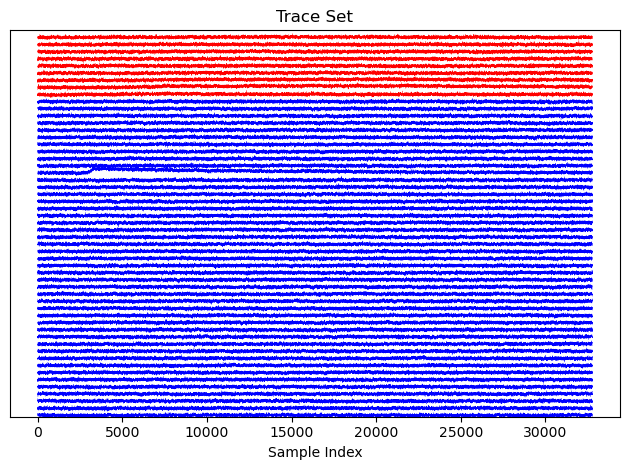

In [34]:
plot_trace_set(loaded_traces[97])

In [35]:
amps = [trigger.fit(trace)[0] for trace in loaded_traces[97]]

In [37]:
np.max(amps)

13.926256801823333

In [39]:
amps[30:]

[-0.4349165183867182,
 0.8371957378967253,
 0.05327040366022784,
 0.9706719326489235,
 13.926256801823333,
 0.3753138060896321,
 1.0413032752026212,
 0.6889613040104604,
 -0.34236715025960673,
 -0.2607350061169701,
 0.2869471154139478,
 1.0369222156176436,
 -0.543486079525725,
 -0.028994262949111886,
 1.0807749775686348,
 2.818417743916254,
 3.4909860633953294,
 1.4015909584457853,
 -0.038844523488294216,
 1.3128514220866476,
 1.1162667696688107,
 0.9746603752886396,
 1.115878889451627,
 1.6273205740551082]

In [ ]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import TraceSimulator

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('../archive/config.yaml')
ts = TraceSimulator(config)


In [62]:
trace = ts.generate(E=15, x=-40, y=80, z=-1800, no_noise=False, type_recoil='NR', quantize=True, phonon_only=False)

In [1]:
# Parameters
energy = 150
n_sets = 100
sampling_frequency = 3906250

# Load template and noise PSD
template = np.load("../templates/template_K_alpha_tight.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")

# Load traces for a single energy level
trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)

NameError: name 'np' is not defined

In [65]:
# Assuming you have already initialized:
# - `trace` as shape (1, 54, 32768) from a simulator
# - `OFtrigger` object as `trigger`

for i in range(trace.shape[1]):
    trace_single = trace[0][i]  # shape: (32768,)
    trace_offset = trace_single[:2048]
    
    mean_val = np.mean(trace_offset)
    std_val = np.std(trace_offset)
    
    amp, chi2 = trigger.fit(trace_single)
    
    print(f"Trace {i:2d} | Mean: {mean_val: .4f}, Std: {std_val: .4f}, Amp: {amp: .2f}, Chi²: {chi2: .2f}")


Trace  0 | Mean: -1.6411, Std:  5.4500, Amp:  1.06, Chi²:  0.22
Trace  1 | Mean:  1.5654, Std:  5.5507, Amp: -0.39, Chi²:  0.22
Trace  2 | Mean: -0.4531, Std:  5.2508, Amp:  1.10, Chi²:  0.22
Trace  3 | Mean:  0.0078, Std:  5.2482, Amp: -0.25, Chi²:  0.22
Trace  4 | Mean:  0.4072, Std:  5.2796, Amp: -0.31, Chi²:  0.22
Trace  5 | Mean:  0.2075, Std:  5.3687, Amp: -1.03, Chi²:  0.22
Trace  6 | Mean: -0.0532, Std:  5.0629, Amp:  0.54, Chi²:  0.22
Trace  7 | Mean: -0.7656, Std:  5.5055, Amp:  0.13, Chi²:  0.22
Trace  8 | Mean: -0.8789, Std:  5.3738, Amp:  0.42, Chi²:  0.22
Trace  9 | Mean: -0.7305, Std:  5.3174, Amp:  1.12, Chi²:  0.22
Trace 10 | Mean: -1.1855, Std:  5.3647, Amp: -0.15, Chi²:  0.22
Trace 11 | Mean:  2.0576, Std:  5.3102, Amp: -1.45, Chi²:  0.22
Trace 12 | Mean: -2.0347, Std:  5.2147, Amp:  0.65, Chi²:  0.22
Trace 13 | Mean:  0.0410, Std:  5.3419, Amp: -0.18, Chi²:  0.22
Trace 14 | Mean: -0.3394, Std:  5.4672, Amp: -1.04, Chi²:  0.22
Trace 15 | Mean: -0.8657, Std:  5.3767, 

In [58]:
trace.shape

(1, 54, 32768)